##### Make four files in the same standards of honda_2d_homestake_2015_numu.root from the Bartol flux tables

In [7]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
import dunestyle.matplotlib as dunestyle


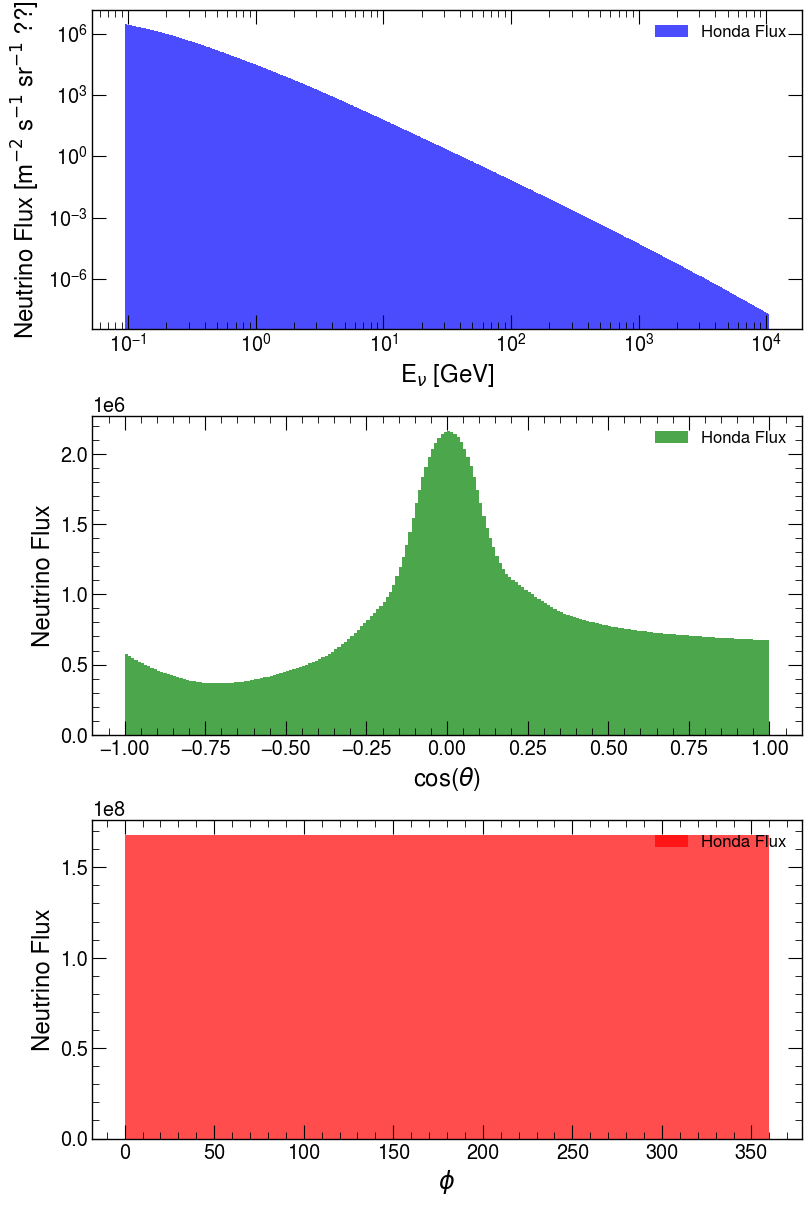

In [8]:

# Open the ROOT file
file_path = "honda_2d_homestake_2015_numu.root"  # Replace with your ROOT file path
histogram_name = "flux"  # Replace with your histogram's name
file = uproot.open(file_path)
hist3d = file[histogram_name]

# Extract the data
x_edges = hist3d.axis(0).edges()  # Bin edges for X
y_edges = hist3d.axis(1).edges()  # Bin edges for Y
z_edges = hist3d.axis(2).edges()  # Bin edges for Z
contents = hist3d.values()  # 3D array of bin contents

# Project onto the X axis (sum over Y and Z)
proj_x = contents.sum(axis=(1, 2))  # Collapse Y and Z axes

# Project onto the Y axis (sum over X and Z)
proj_y = contents.sum(axis=(0, 2))  # Collapse X and Z axes

# Project onto the Z axis (sum over X and Y)
proj_z = contents.sum(axis=(0, 1))  # Collapse X and Y axes

# Plot the projections
fig, axs = plt.subplots(3, 1, figsize=(8, 12), constrained_layout=True)

# Projection onto X axis
axs[0].bar(
    (x_edges[:-1] + x_edges[1:]) / 2, proj_x, width=np.diff(x_edges),
    color='blue', alpha=0.7, label="Honda Flux"
)

#axs[0].set_title("Projection onto X axis")
axs[0].set_xlabel(r"E$_\nu$ [GeV]")
axs[0].set_xscale('log')  # For logarithmic x-axis
axs[0].set_yscale('log')  # For logarithmic y-axis
axs[0].set_ylabel(r"Neutrino Flux [m$^{-2}$ s$^{-1}$ sr$^{-1}$ ??]")
axs[0].legend()

# Projection onto Y axis
axs[1].bar(
    (y_edges[:-1] + y_edges[1:]) / 2, proj_y, width=np.diff(y_edges),
    color='green', alpha=0.7, label="Honda Flux"
)
#axs[1].set_title("Projection onto Y axis")
axs[1].set_xlabel(r"cos($\theta$)")
axs[1].set_ylabel("Neutrino Flux")
axs[1].legend()

# Projection onto Z axis
axs[2].bar(
    (z_edges[:-1] + z_edges[1:]) / 2, proj_z, width=np.diff(z_edges),
    color='red', alpha=0.7, label="Honda Flux"
)
#axs[2].set_title("Projection onto Z axis")
axs[2].set_xlabel(r"$\phi$")
axs[2].set_ylabel("Neutrino Flux")
axs[2].legend()

# Show the plots
plt.show()


In [38]:
proj_y[0]

574125.323914088

In [9]:
# Check normalization for the X projection
sum_proj_x = proj_x.sum()  # Total sum of bin heights for X
is_x_normalized = np.isclose(sum_proj_x, 1.0)
print(f"Projection onto X axis normalized? {is_x_normalized} (Sum = {sum_proj_x})")

# Check normalization for the Y projection
sum_proj_y = proj_y.sum()  # Total sum of bin heights for Y
is_y_normalized = np.isclose(sum_proj_y, 1.0)
print(f"Projection onto Y axis normalized? {is_y_normalized} (Sum = {sum_proj_y})")

# Check normalization for the Z projection
sum_proj_z = proj_z.sum()  # Total sum of bin heights for Z
is_z_normalized = np.isclose(sum_proj_z, 1.0)
print(f"Projection onto Z axis normalized? {is_z_normalized} (Sum = {sum_proj_z})")


Projection onto X axis normalized? False (Sum = 167921011.58211416)
Projection onto Y axis normalized? False (Sum = 167921011.58211413)
Projection onto Z axis normalized? False (Sum = 167921011.58211413)


##### Let's start to work with the Bartol Flux
##### 3D Atmospheric Neutrino Fluxes, using AGLS1996 fluxes

In [ ]:

import pandas as pd

# File path to the data file
file_path = 'fmin10_0401z.sou_nue'  # Update this with the actual path to your file

# Column names as per the format description
columns = [
    "Energy_Center_GeV",        # Energy at the center of the bin (GeV)
    "Cos_Zenith_or_Azimuth",    # Cos(zenith) or azimuth (degrees)
    "Flux_dN/dlogE_m2_s_sr",    # Flux (dN/d(logE)) in /m²/steradian/sec
    "MC_Stat_Error",            # Monte Carlo statistical error
    "Unweighted_Events"         # Number of unweighted events in the bin
]

# Load the file into a DataFrame
with open(file_path, 'r') as file:
    lines = file.readlines()
    # Find the index where data starts (skip lines beginning with #)
    data_start_idx = next(i for i, line in enumerate(lines) if not line.startswith('#'))

# Read the data into a DataFrame
df_flux = pd.read_csv(
    file_path,
    delim_whitespace=True,  # Columns are separated by whitespace
    skiprows=data_start_idx,  # Skip comment lines
    names=columns           # Assign column names
)
# Drop the first line (row) of the DataFrame
df_flux = df_flux.iloc[1:].reset_index(drop=True)

# Display the first few rows to ensure data is loaded correctly
print(df_flux.head())

  Energy_Center_GeV Cos_Zenith_or_Azimuth  Flux_dN/dlogE_m2_s_sr  \
0             0.112                -0.950              571.82998   
1             0.141                -0.950              519.29215   
2             0.178                -0.950              462.52568   
3             0.224                -0.950              383.80659   
4             0.282                -0.950              310.04144   

   MC_Stat_Error  Unweighted_Events  
0       6.783597            52991.0  
1       6.268597            53254.0  
2       5.618398            52283.0  
3       4.773285            49606.0  
4       4.002113            45993.0  


/tmp/ipykernel_12981/3955670923.py:22: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_flux = pd.read_csv(


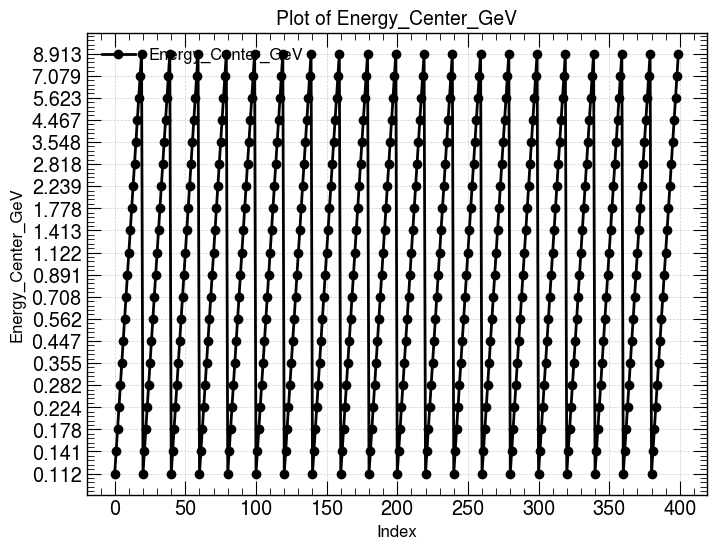

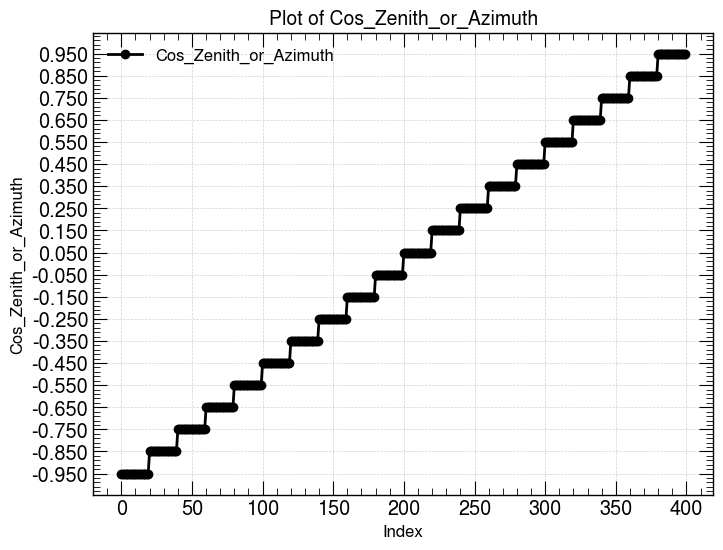

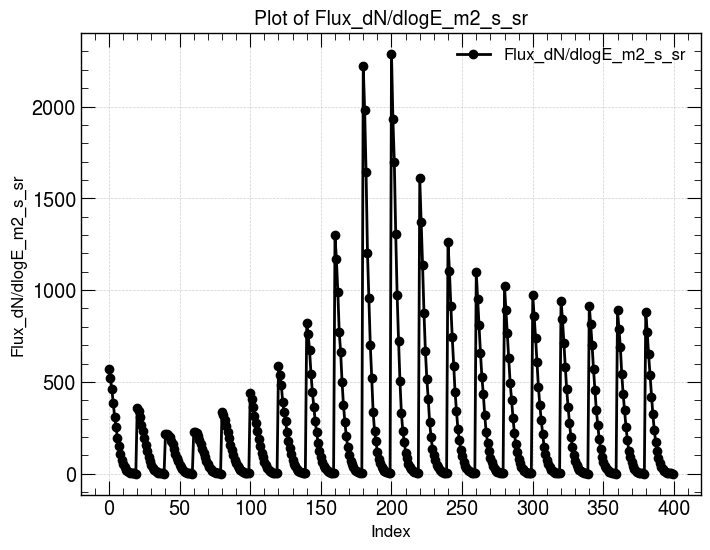

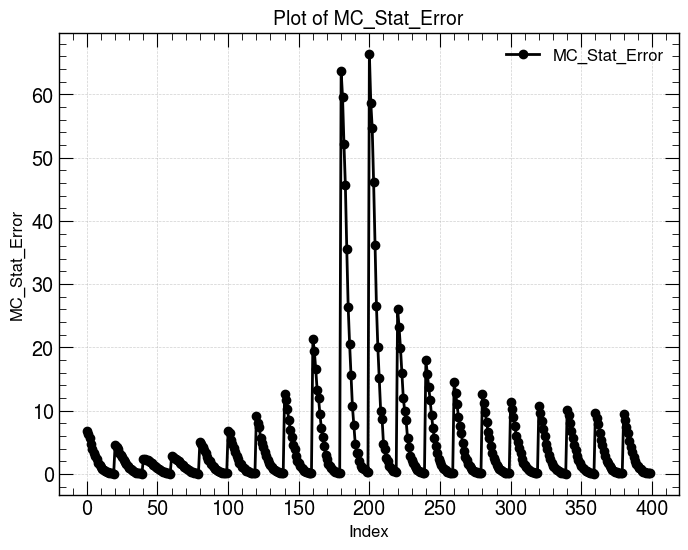

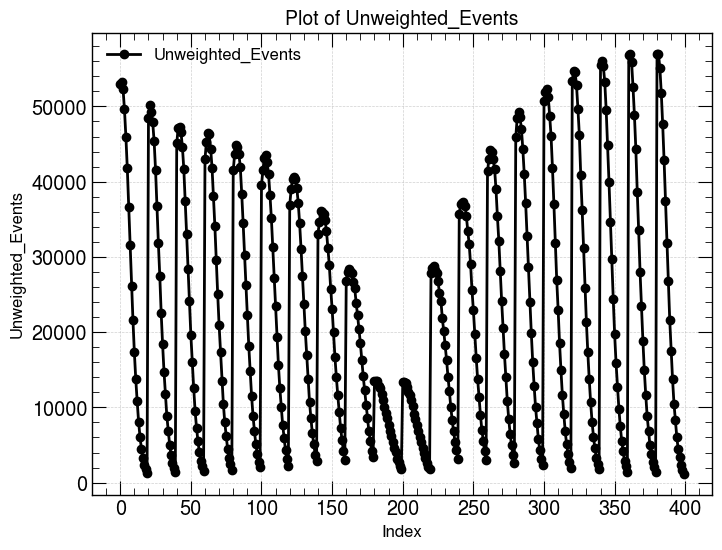

In [ ]:
def plot_distribution(dataframe, column, title=None):
    """
    Plots the distribution of a specified column in the DataFrame.
    
    Parameters:
    - dataframe: The DataFrame containing the data.
    - column: The column to plot.
    - title: Optional title for the plot.
    """
    if column not in dataframe.columns:
        print(f"Column '{column}' not found in the DataFrame.")
        return
    
    plt.figure(figsize=(8, 6))
    plt.plot(dataframe[column], marker='o', linestyle='-', label=column)
    plt.xlabel("Index", fontsize=12)
    plt.ylabel(column, fontsize=12)
    plt.title(title if title else f"Distribution of {column}", fontsize=14)
    plt.grid(True, alpha=0.6)
    plt.legend()
    plt.show()

# Example usage:
columns_to_plot = [
    "Energy_Center_GeV",
    "Cos_Zenith_or_Azimuth",
    "Flux_dN/dlogE_m2_s_sr",
    "MC_Stat_Error",
    "Unweighted_Events"
]


# Call the function for each column
for col in columns_to_plot:
    plot_distribution(df_flux, col, title=f"Plot of {col}")

In [18]:
df_flux.iloc[:,0]

0      0.112
1      0.141
2      0.178
3      0.224
4      0.282
       ...  
395    3.548
396    4.467
397    5.623
398    7.079
399    8.913
Name: Energy_Center_GeV, Length: 400, dtype: object

In [ ]:
df_flux


,Energy_Center_GeV,Cos_Zenith_or_Azimuth,Flux_dN/dlogE_m2_s_sr,MC_Stat_Error,Unweighted_Events
0,0.112,-0.950,571.829980,6.783597,52991.0
1,0.141,-0.950,519.292150,6.268597,53254.0
2,0.178,-0.950,462.525680,5.618398,52283.0
3,0.224,-0.950,383.806590,4.773285,49606.0
4,0.282,-0.950,310.041440,4.002113,45993.0
...,...,...,...,...,...
395,3.548,0.950,5.348326,0.222935,4407.0
396,4.467,0.950,3.420162,0.160608,3409.0
397,5.623,0.950,1.947724,0.112062,2399.0
398,7.079,0.950,1.209533,0.076261,1741.0


In [23]:
cosZ = np.array(df_flux.iloc[:,1], dtype=float)
flux = np.array(df_flux.iloc[:,2], dtype=float)
E_nu = np.array(df_flux.iloc[:,0], dtype=float)

In [ ]:
import numpy as np


# Extract the energy and flux data
energy = df_flux["Energy_Center_GeV"].values  # Energy in GeV
flux = df_flux["Flux_dN/dlogE_m2_s_sr"].values  # Flux in dN/dlogE

# Compute the log(E) values
log_energy = np.log(np.array(energy, dtype=float))

# Calculate the bin widths in log(E)
log_energy_diff = np.diff(log_energy)  # Differences between log(E) bins

# For numerical integration, align bin widths with the flux values
# Assuming the flux values are defined at the bin centers
flux_integration = np.sum(flux[:-1] * log_energy_diff)  # Sum flux * width


print(f"Integrated flux over energy: {flux_integration} /m²/s/sr")


Integrated flux over energy: 22396.99103726309 /m²/s/sr


In [28]:
import numpy as np
import pandas as pd

# Assuming df_flux is the DataFrame containing the data
cos_values = df_flux["Cos_Zenith_or_Azimuth"].unique()  # Unique cos(zenith) values
results = []

for cos_val in cos_values:
    # Filter the DataFrame for the current cos(zenith) value
    group = df_flux[df_flux["Cos_Zenith_or_Azimuth"] == cos_val]
    
    # Extract energy and flux for this group
    energy = group["Energy_Center_GeV"].values
    flux = group["Flux_dN/dlogE_m2_s_sr"].values

    # Compute the log(E) values
    log_energy = np.log(np.array(energy, dtype=float))

    # Calculate bin widths in log(E)
    log_energy_diff = np.diff(log_energy)

    # Integrate flux over energy for this cos(zenith) value
    integral = np.sum(flux[:-1] * log_energy_diff)

    # Store the result
    results.append({"Cos_Zenith_or_Azimuth": cos_val, "Integrated_Flux": integral})

# Convert results to a DataFrame for easier analysis
df_results = pd.DataFrame(results)

print(df_results)


   Cos_Zenith_or_Azimuth  Integrated_Flux
0                 -0.950       731.502629
1                 -0.850       523.413979
2                 -0.750       397.554711
3                 -0.650       412.792400
4                 -0.550       524.874972
5                 -0.450       641.157290
6                 -0.350       808.004790
7                 -0.250      1080.600392
8                 -0.150      1547.889128
9                 -0.050      2382.152089
10                 0.050      2424.928632
11                 0.150      1732.841208
12                 0.250      1439.642867
13                 0.350      1284.684072
14                 0.450      1209.873853
15                 0.550      1152.763139
16                 0.650      1113.739431
17                 0.750      1075.540828
18                 0.850      1040.547223
19                 0.950      1006.672014


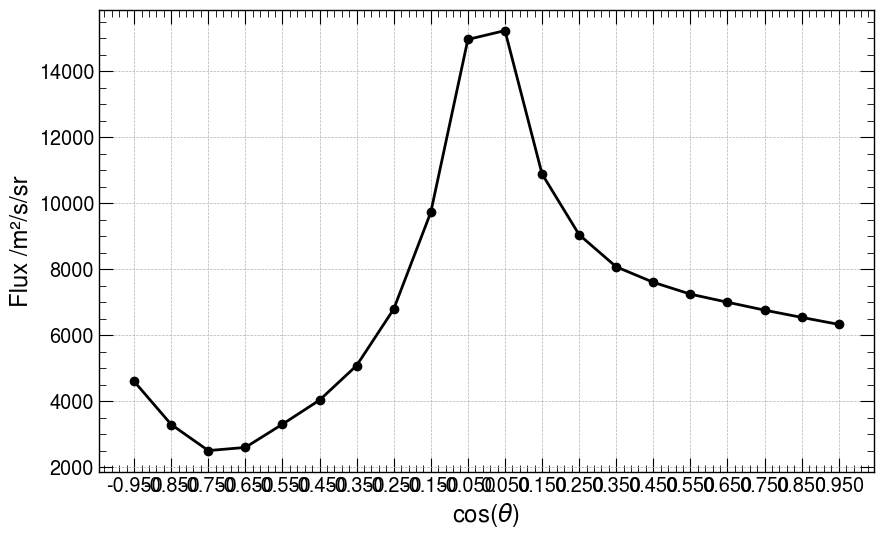

In [49]:
import math as m
plt.figure(figsize=(10, 6))
plt.plot(df_results.iloc[:,0],2*m.pi*df_results.iloc[:,1], marker='o', linestyle='-')
plt.xlabel(r'cos($\theta$)')
plt.ylabel('Flux /m²/s/sr')
plt.grid()
plt.show()


In [ ]:
import numpy as np
from scipy.integrate import dblquad

# Define the function to integrate over solid angle
def flux(theta, phi):
    # Example function: Replace with your specific function
    return float(np.array(df_flux[df_flux["Cos_Zenith_or_Azimuth"] == theta]) # sin(theta) is required for solid angle

# Integrate over the full solid angle
# Bounds for theta: 0 to pi
# Bounds for phi: 0 to 2*pi
result, error = dblquad(
    lambda phi, theta: flux(theta, phi) * np.sin(theta),  # Integrand
    0, np.pi,  # Bounds for theta
    lambda _: 0, lambda _: 2 * np.pi  # Bounds for phi
)

print(f"Solid angle integral result: {result}")
print(f"Estimated error: {error}")


TypeError: float() argument must be a string or a real number, not 'DataFrame'

In [40]:
import math as m

In [41]:
4*m.pi

12.566370614359172

In [47]:
theta=-0.850
df_flux[df_flux["Cos_Zenith_or_Azimuth"] == theta]

,Energy_Center_GeV,Cos_Zenith_or_Azimuth,Flux_dN/dlogE_m2_s_sr,MC_Stat_Error,Unweighted_Events
